In [1]:
import os, csv
import pandas as pd
import numpy as np
from keras.preprocessing import sequence
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras import layers, Input
from keras.optimizers import RMSprop, Adam
from sklearn.model_selection import train_test_split

from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

import csv
import os,random

from keras.models import Sequential
from keras.layers import Dense
from keras.layers.convolutional import Convolution1D
from keras.layers.core import Dropout, Activation, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import *
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt

import datetime
now = datetime.datetime.now

In [104]:
def process(temp):
    min_len = 3000
    for i in range(11):
        j = 0
        while temp[j][i] != '' and j<len(temp)-1:
            j+=1
        min_len = min(min_len, j);
#     print(min_len)
    return temp[:min_len]

In [102]:
with open("./po-cf-ex-1-features/B_ID1.csv", 'r') as f:
    temp = list(csv.reader(f, delimiter = ","))
temp = process(temp)
len(temp)

490


490

In [123]:
types = {'B_ID':8, 'E_ID':16, 'NE_ID':27, 'S_ID':10, 'P_ID':16}
x_val = []
x_id = []
for ids, vals in types.items():
    for i in range(1,vals+1):
        x_id.append(ids + str(i))
        try: 
            with open("./po-cf-ex-1-features/"+ids+str(i)+".csv", 'r') as f:
                temp = list(csv.reader(f, delimiter = ","))
            temp = process(temp)
            temp = np.asarray(temp)
            temp = temp.astype(np.float64)
        except:
            print(ids, i)
        x_val.append(temp.tolist())
# for i in range(78):
#     for j in range(len(x_val[i])):
#         for k in range(11):
#             if x_val[i][j][k]!=x_val[i][j][k]:
#                 if(j==400):
#                     print(x_val[i][j][k])
x_val = np.asarray(sequence.pad_sequences(x_val, maxlen=600)).astype(np.float64)
print("x_val shape:", x_val.shape)

E_ID 8
x_val shape: (77, 600, 11)


In [126]:
# df = pd.read_excel("./KiMoRe/E_ID1/Es1/Label/ClinicalAssessment_E_ID1.xlsx")
# np.array(df).reshape((16,))
# df
po_val = []
cf_val = []
for ids in x_id:
    try:
        df = pd.read_excel("./KiMoRe/"+ids+"/Es1/Label/ClinicalAssessment_"+ids+".xlsx")
    except:
        print("problem in: ", ids)
    df = np.array(df).reshape((16,))
    po_val.append(df[6])
    cf_val.append(df[11])
    if len(po_val)==24:
        print(ids)
po_val = np.asarray(po_val).astype(np.float64)
cf_val = np.asarray(cf_val).astype(np.float64)
ts_val = po_val+cf_val
print("shape of CF: ", cf_val.shape)
print("shape of PO: ", po_val.shape)
print("shape of TS: ", ts_val.shape)
# print(po_val)
for i in range(77):
    if np.isnan(ts_val[i]):
        print(i)
print(ts_val)


E_ID16
shape of CF:  (77,)
shape of PO:  (77,)
shape of TS:  (77,)
[41.         38.         28.21008112 33.3397327  44.33333333 45.33333333
 40.33333333 44.33333333 48.33333333 49.33333333 42.66666667 44.66666667
 46.         46.66666667 50.         48.66666667 50.         48.33333333
 50.         50.         46.33333333 44.         50.         47.
 39.66666667 41.         44.33333333 46.33333333 40.66666667 43.66666667
 42.         40.         42.         34.         46.         40.
 50.         50.         45.         47.         47.         38.
 50.         46.         46.         43.         41.         50.
 47.         49.         49.         27.         34.         44.
 26.         32.89508774 38.41075339 26.66666667 36.         26.33333333
 33.66666667 48.         27.         50.         14.         33.
 50.         22.         32.         40.         34.3081805  14.66666667
 35.66666667 36.66666667 36.         27.66666667 37.        ]


In [127]:
def jumble_up(val):
    return np.random.permutation(val)


In [128]:
indices = np.arange(77)
indices = jumble_up(indices)
print(indices)
temp_x = x_val
temp_po = po_val
for i in range(77):
    x_val[i] = temp_x[indices[i]]
    po_val[i] = temp_po[indices[i]]

[46 42 71 64 45 35 20  8 24 68 40  7 48 28  6 62 67 49 69 51 52 18 43  9
 60 11 10 56 12 74 25 59 57 61  4 15 23 33 66  5 72 36 32 76 17 53  0 75
 63 27 54 30 55 14 73 38 21 22 44 31 39 34 41 37  3 65 50 26 19 29 16 58
 13  1 70 47  2]


In [131]:
def Network():
    model = Sequential()
    model.add(Convolution1D(100, 5, padding ='same', strides = 2, input_shape = (timesteps,n_dim)))
    model.add(LeakyReLU())
    model.add(Dropout(dropout_rate))

    model.add(Convolution1D(30, 3, padding ='same', strides = 2))
    model.add(LeakyReLU())
    model.add(Dropout(dropout_rate))

    model.add(Convolution1D(10, 3, padding ='same'))
    model.add(LeakyReLU())
    model.add(Dropout(dropout_rate))

    model.add(Flatten())

    model.add(Dense(200))
    model.add(LeakyReLU())
    model.add(Dropout(dropout_rate))

    model.add(Dense(100))
    model.add(LeakyReLU())
    model.add(Dropout(dropout_rate))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))


    model.compile(loss='binary_crossentropy', optimizer=Adam())
    
    # Early stopping if the validaton Loss does not decrease for 100 epochs
    early_stopping = EarlyStopping(monitor='val_loss', patience = 100)

    t = now()
    history = model.fit(x_train, y_train, batch_size=5, epochs=500, verbose=1, 
                     validation_data=(x_test, y_test),
                     callbacks = [early_stopping])
    print('Training time: %s' % (now() - t))
    
    # Plot the results
    plt.figure(1)
    plt.subplot(221)
    plt.plot(history.history['loss'])
    plt.title('Training Loss')
    plt.subplot(222)
    plt.plot(history.history['val_loss'])
    plt.title('Validation Loss')
    plt.tight_layout()
    plt.show()
    
    # Plot the prediction of the CNN model for the training and validation sets
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)

    plt.figure(figsize = (8,8))
    plt.subplot(2,1,1)
    plt.plot(pred_train,'s', color='red', label='Prediction', linestyle='None', alpha = 0.5, markersize=6)
    plt.plot(y_train,'o', color='green',label='Quality Score', alpha = 0.4, markersize=6)
    plt.ylim([-0.1,1.1])
    plt.title('Training Set',fontsize=18)
    plt.xlabel('Sequence Number',fontsize=16)
    plt.ylabel('Quality Scale',fontsize=16)
    plt.legend(loc=3, prop={'size':14}) # loc:position
    plt.subplot(2,1,2)
    plt.plot(pred_test,'s', color='red', label='Prediction', linestyle='None', alpha = 0.5, markersize=6)
    plt.plot(y_test,'o', color='green',label='Quality Score', alpha = 0.4, markersize=6)
    plt.title('Testing Set',fontsize=18)
    plt.ylim([-0.1,1.1])
    plt.xlabel('Sequence Number',fontsize=16)
    plt.ylabel('Quality Score',fontsize=16)
    plt.legend(loc=3, prop={'size':14}) # loc:position
    plt.tight_layout()
#     plt.savefig('../../Results/CNN_Vicon_Scores.png', dpi=300)
    plt.show()
    
    
    # Calculate the cumulative deviation and rms deviation for the validation set
    test_dev = abs(np.squeeze(pred_test)-y_test)
    # Cumulative deviation
    mean_abs_dev = np.mean(test_dev)
    # RMS deviation
    rms_dev = sqrt(mean_squared_error(pred_test, y_test))
    print('Mean absolute deviation:', mean_abs_dev)
    print('RMS deviation:', rms_dev)
    
    return mean_abs_dev, rms_dev

Epoch 1/500
11/11 [==============================] - 2s 51ms/step - loss: 0.6061 - val_loss: 0.5445
Epoch 2/500
11/11 [==============================] - 0s 15ms/step - loss: 0.5090 - val_loss: 0.5045
Epoch 3/500
11/11 [==============================] - 0s 13ms/step - loss: 0.5151 - val_loss: 0.5104
Epoch 4/500
11/11 [==============================] - 0s 12ms/step - loss: 0.4892 - val_loss: 0.4708
Epoch 5/500
11/11 [==============================] - 0s 14ms/step - loss: 0.4356 - val_loss: 0.4468
Epoch 6/500
11/11 [==============================] - 0s 13ms/step - loss: 0.4206 - val_loss: 0.4463
Epoch 7/500
11/11 [==============================] - 0s 13ms/step - loss: 0.4391 - val_loss: 0.4462
Epoch 8/500
11/11 [==============================] - 0s 14ms/step - loss: 0.3966 - val_loss: 0.4404
Epoch 9/500
11/11 [==============================] - 0s 14ms/step - loss: 0.3989 - val_loss: 0.4302
Epoch 10/500
11/11 [==============================] - 0s 12ms/step - loss: 0.3713 - val_loss: 0.4133

11/11 [==============================] - 0s 22ms/step - loss: 0.3628 - val_loss: 0.3923
Epoch 163/500
11/11 [==============================] - 0s 22ms/step - loss: 0.3765 - val_loss: 0.3920
Epoch 164/500
11/11 [==============================] - 0s 22ms/step - loss: 0.3590 - val_loss: 0.3896
Epoch 165/500
11/11 [==============================] - 0s 20ms/step - loss: 0.4145 - val_loss: 0.3889
Epoch 166/500
11/11 [==============================] - 0s 20ms/step - loss: 0.3962 - val_loss: 0.3952
Epoch 167/500
11/11 [==============================] - 0s 23ms/step - loss: 0.3080 - val_loss: 0.3883
Epoch 168/500
11/11 [==============================] - 0s 20ms/step - loss: 0.3616 - val_loss: 0.3956
Epoch 169/500
11/11 [==============================] - 0s 20ms/step - loss: 0.3621 - val_loss: 0.3896
Epoch 170/500
11/11 [==============================] - 0s 22ms/step - loss: 0.4014 - val_loss: 0.3862
Epoch 171/500
11/11 [==============================] - 0s 20ms/step - loss: 0.4353 - val_loss: 0

11/11 [==============================] - 0s 19ms/step - loss: 0.3882 - val_loss: 0.3930
Epoch 323/500
11/11 [==============================] - 0s 19ms/step - loss: 0.3817 - val_loss: 0.3909
Epoch 324/500
11/11 [==============================] - 0s 21ms/step - loss: 0.3872 - val_loss: 0.3864
Epoch 325/500
11/11 [==============================] - 0s 24ms/step - loss: 0.3722 - val_loss: 0.3833
Epoch 326/500
11/11 [==============================] - 0s 18ms/step - loss: 0.3715 - val_loss: 0.3831
Epoch 327/500
11/11 [==============================] - 0s 19ms/step - loss: 0.3630 - val_loss: 0.3861
Epoch 328/500
11/11 [==============================] - 0s 18ms/step - loss: 0.3036 - val_loss: 0.3853
Epoch 329/500
11/11 [==============================] - 0s 19ms/step - loss: 0.3477 - val_loss: 0.3847
Epoch 330/500
11/11 [==============================] - 0s 19ms/step - loss: 0.3922 - val_loss: 0.3845
Training time: 0:01:00.425741


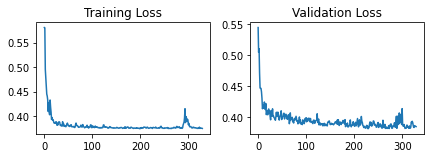

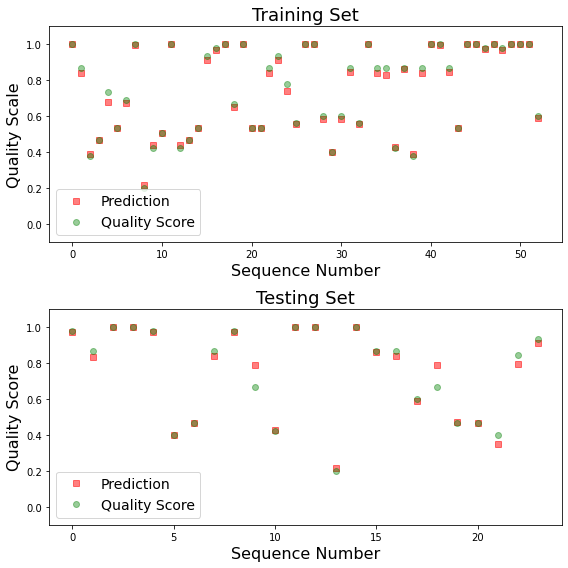

Mean absolute deviation: 0.021902993542176712
RMS deviation: 0.04017746637488046


In [132]:
Mean_abs_dev, RMS_dev  = Network()


In [129]:
timesteps = 600 # Number of timesteps
nr = 77   # Number of repetitions
n_dim = 11  # Dimension of data sequences
dropout_rate = 0.1   # Droput rate

In [130]:
x_val /= np.max(np.abs(x_val))
po_val /= np.max(np.abs(po_val))
x_train, x_test, y_train, y_test = train_test_split(x_val,po_val, test_size=0.3)
print(y_train)

[1.         0.86666667 0.37777778 0.46666667 0.73333333 0.53333333
 0.68888889 1.         0.2        0.42222222 0.50556715 1.
 0.42222222 0.46666667 0.53333333 0.93333333 0.97777778 1.
 0.66666667 1.         0.53333333 0.53333333 0.86666667 0.93333333
 0.77777778 0.56089971 1.         1.         0.6        0.4
 0.6        0.86666667 0.56089971 1.         0.86666667 0.86666667
 0.42222222 0.86666667 0.37777778 0.86666667 1.         1.
 0.86666667 0.53333333 1.         1.         0.97777778 1.
 0.97777778 1.         1.         1.         0.6       ]


In [133]:
def Network_rnn():
    model = Sequential()

    model.add(Bidirectional(LSTM(100, recurrent_dropout = 0.5, return_sequences = True), input_shape = (timesteps,n_dim)))
    model.add(Dropout(0.2))

    model.add(Dense(30, activation = 'tanh'))
    model.add(Dropout(0.5))

    model.add(Bidirectional(LSTM(10, recurrent_dropout = 0.5)))
    model.add(Dropout(0.25))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=Adam())
    
    # Early stopping if the validaton Loss does not decrease for 100 epochs
    early_stopping = EarlyStopping(monitor='val_loss', patience = 100)

    t = now()
    history = model.fit(x_train, y_train, batch_size=5, epochs=500, verbose=1, 
                     validation_data=(x_test, y_test),
                     callbacks = [early_stopping])
    print('Training time: %s' % (now() - t))
    
    # Plot the results
    plt.figure(1)
    plt.subplot(221)
    plt.plot(history.history['loss'])
    plt.title('Training Loss')
    plt.subplot(222)
    plt.plot(history.history['val_loss'])
    plt.title('Validation Loss')
    plt.tight_layout()
    plt.show()
    
    # Plot the prediction of the CNN model for the training and validation sets
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)

    plt.figure(figsize = (8,8))
    plt.subplot(2,1,1)
    plt.plot(pred_train,'s', color='red', label='Prediction', linestyle='None', alpha = 0.5, markersize=6)
    plt.plot(y_train,'o', color='green',label='Quality Score', alpha = 0.4, markersize=6)
    plt.ylim([-0.1,1.1])
    plt.title('Training Set',fontsize=18)
    plt.xlabel('Sequence Number',fontsize=16)
    plt.ylabel('Quality Scale',fontsize=16)
    plt.legend(loc=3, prop={'size':14}) # loc:position
    plt.subplot(2,1,2)
    plt.plot(pred_test,'s', color='red', label='Prediction', linestyle='None', alpha = 0.5, markersize=6)
    plt.plot(y_test,'o', color='green',label='Quality Score', alpha = 0.4, markersize=6)
    plt.title('Testing Set',fontsize=18)
    plt.ylim([-0.1,1.1])
    plt.xlabel('Sequence Number',fontsize=16)
    plt.ylabel('Quality Score',fontsize=16)
    plt.legend(loc=3, prop={'size':14}) # loc:position
    plt.tight_layout()
#     plt.savefig('../../Results/CNN_Vicon_Scores.png', dpi=300)
    plt.show()
    
    
    # Calculate the cumulative deviation and rms deviation for the validation set
    test_dev = abs(np.squeeze(pred_test)-y_test)
    # Cumulative deviation
    mean_abs_dev = np.mean(test_dev)
    # RMS deviation
    rms_dev = sqrt(mean_squared_error(pred_test, y_test))
    print('Mean absolute deviation:', mean_abs_dev)
    print('RMS deviation:', rms_dev)
    
    return mean_abs_dev, rms_dev

Epoch 1/500
11/11 [==============================] - 1s 50ms/step - loss: 0.6271 - val_loss: 0.5383
Epoch 2/500
11/11 [==============================] - 0s 22ms/step - loss: 0.4758 - val_loss: 0.4840
Epoch 3/500
11/11 [==============================] - 0s 16ms/step - loss: 0.4564 - val_loss: 0.4678
Epoch 4/500
11/11 [==============================] - 0s 11ms/step - loss: 0.4601 - val_loss: 0.4436
Epoch 5/500
11/11 [==============================] - 0s 15ms/step - loss: 0.3943 - val_loss: 0.4423
Epoch 6/500
11/11 [==============================] - 0s 14ms/step - loss: 0.3887 - val_loss: 0.4399
Epoch 7/500
11/11 [==============================] - 0s 14ms/step - loss: 0.4338 - val_loss: 0.4399
Epoch 8/500
11/11 [==============================] - 0s 16ms/step - loss: 0.4283 - val_loss: 0.4123
Epoch 9/500
11/11 [==============================] - 0s 14ms/step - loss: 0.4343 - val_loss: 0.4090
Epoch 10/500
11/11 [==============================] - 0s 17ms/step - loss: 0.4253 - val_loss: 0.4124

11/11 [==============================] - 0s 10ms/step - loss: 0.3718 - val_loss: 0.3809
Epoch 163/500
11/11 [==============================] - 0s 10ms/step - loss: 0.4425 - val_loss: 0.3809
Epoch 164/500
11/11 [==============================] - 0s 9ms/step - loss: 0.3687 - val_loss: 0.3810
Epoch 165/500
11/11 [==============================] - 0s 10ms/step - loss: 0.4066 - val_loss: 0.3821
Epoch 166/500
11/11 [==============================] - 0s 11ms/step - loss: 0.4445 - val_loss: 0.3845
Epoch 167/500
11/11 [==============================] - 0s 12ms/step - loss: 0.3413 - val_loss: 0.3825
Epoch 168/500
11/11 [==============================] - 0s 11ms/step - loss: 0.3966 - val_loss: 0.3871
Epoch 169/500
11/11 [==============================] - 0s 10ms/step - loss: 0.3556 - val_loss: 0.3858
Epoch 170/500
11/11 [==============================] - 0s 11ms/step - loss: 0.3957 - val_loss: 0.3831
Epoch 171/500
11/11 [==============================] - 0s 17ms/step - loss: 0.3961 - val_loss: 0.

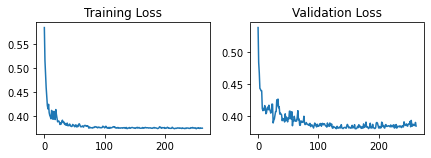

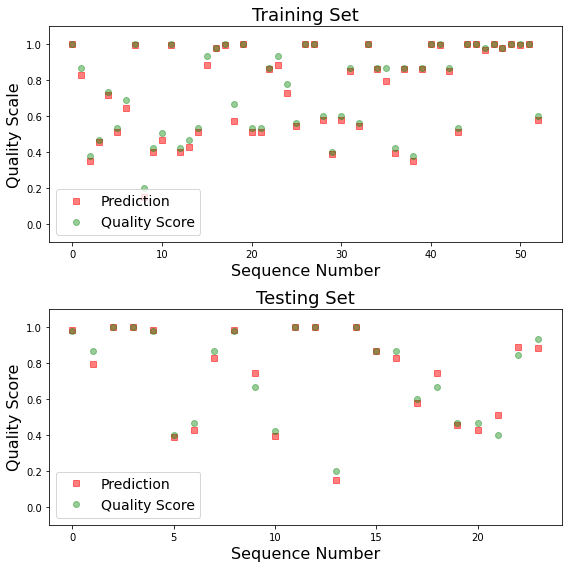

Mean absolute deviation: 0.029992762732285055
RMS deviation: 0.042833894405960984


In [134]:
Mean_abs_dev2, RMS_dev2  = Network()

In [108]:
input1 = Input(shape = (None,), name = 'ip1')
embed1 = layers.Embedding(2501, 5, mask_zero = True)(input1)
encoded_input1 = layers.LSTM(32)(embed1)

input2 = Input(shape = (None,), name = 'ip2')
embed2 = layers.Embedding(2501, 5, mask_zero = True)(input2)
encoded_input2 = layers.LSTM(32)(embed2)
# concatenated = layers.Average()([encoded_input1, encoded_input2])

concatenated = layers.concatenate([encoded_input1, encoded_input2], axis = 1)
print(concatenated.shape)
output = layers.Dense(1,activation='softmax')(concatenated)


model = Model([input1, input2], output);
model.compile(optimizer='adam',
loss='mse',
metrics=['acc'])
model.summary()

(None, 64)
Model: "model_18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
ip1 (InputLayer)                [(None, None)]       0                                            
__________________________________________________________________________________________________
ip2 (InputLayer)                [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_42 (Embedding)        (None, None, 5)      12505       ip1[0][0]                        
__________________________________________________________________________________________________
embedding_43 (Embedding)        (None, None, 5)      12505       ip2[0][0]                        
________________________________________________________________________________

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

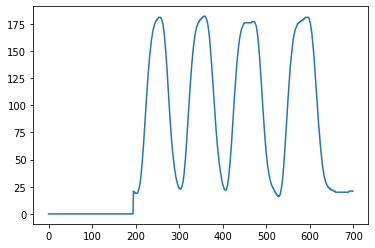

In [63]:
plt.plot(x_val[0,:,:1])

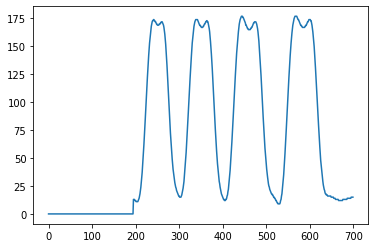

In [64]:
plt.plot(x_val[0,:,1:])

In [113]:
history = model.fit([x_train[:,:,0], x_train[:,:,1]], y_train,epochs=100, validation_split=0.2)

Epoch 1/100


InvalidArgumentError:  indices[15,1971] = -1 is not in [0, 2501)
	 [[node model_18/embedding_43/embedding_lookup (defined at <ipython-input-113-2fa617c1a1f4>:1) ]] [Op:__inference_train_function_231469]

Errors may have originated from an input operation.
Input Source operations connected to node model_18/embedding_43/embedding_lookup:
 model_18/embedding_43/embedding_lookup/226416 (defined at /usr/lib/python3.8/contextlib.py:113)

Function call stack:
train_function


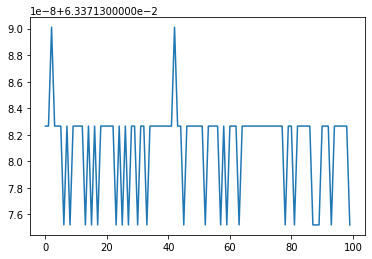

In [102]:
plt.plot(history.history['loss'])

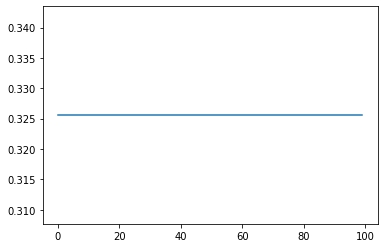

In [103]:
plt.plot(history.history['acc'])

In [104]:
y_pred = model.predict([x_test[:,:,0],x_test[:,:,1]])
y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)